In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

# Task 1
#### Download the data, display the column names and dataset size

In [2]:
df = pd.read_csv("emails.csv", index_col = False)
df.drop(columns='Email No.', inplace=True)
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [3]:
df.shape

(5172, 3001)

# Task 2
#### Handle gaps (fill or delete if possible)

In [4]:
# df.fillna(0)

# Task 3
#### Visualize the value: build a graph (heat map) that shows the correction sign between themselves and with the target variable (markup); construct histograms of the distribution of the label boxplot-and the attribute and the target variable (if the character is too much is limited to a few)

In [5]:
data_for_corr = df.iloc[:,:30]
corr = data_for_corr.corr()

<AxesSubplot:>

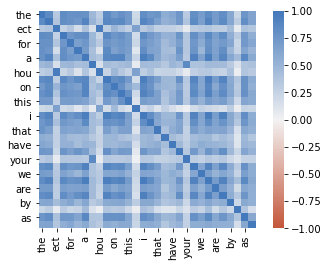

In [6]:
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 250, as_cmap=True),
    square=True
)

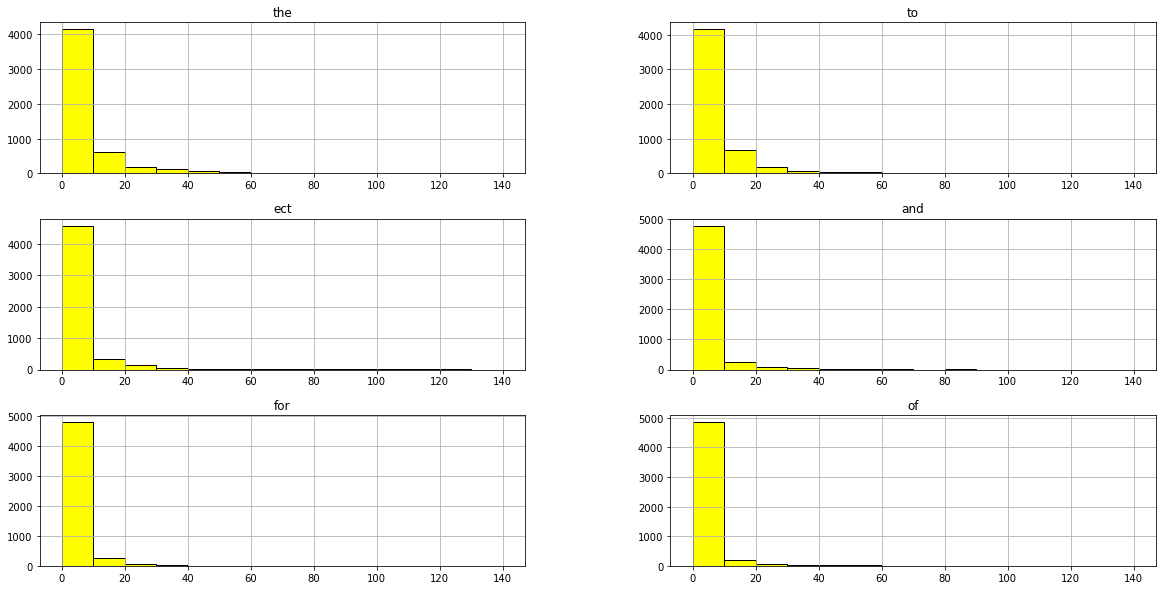

In [7]:
df.iloc[:,:6].hist(color='yellow', edgecolor='black', bins=np.arange(start=0, stop=150, step=10), figsize=[20,10])
plt.show()

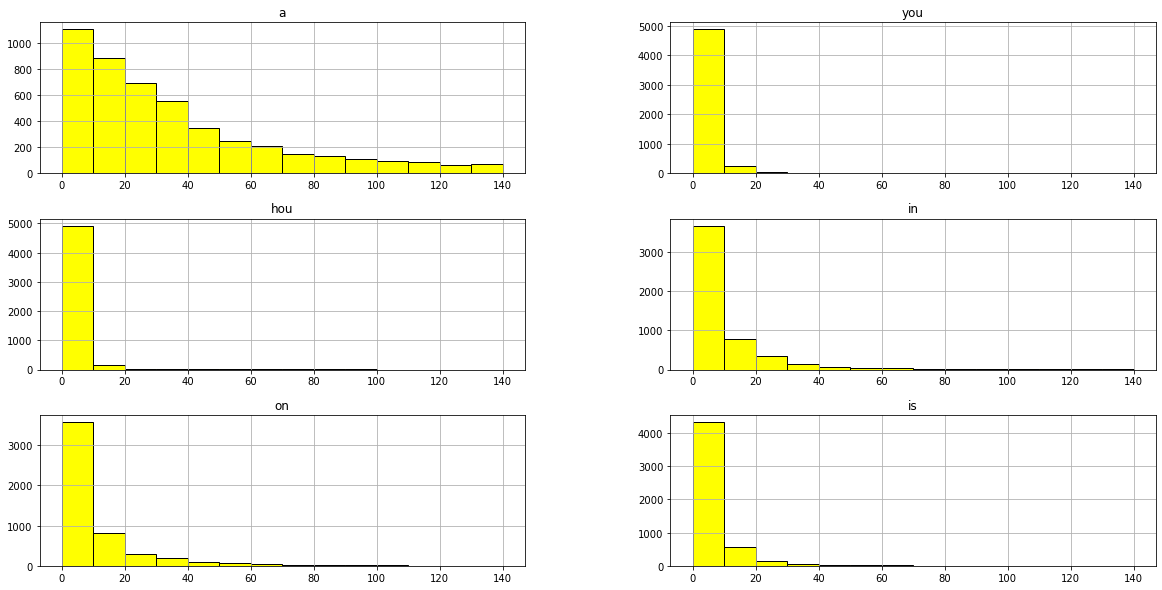

In [8]:
df.iloc[:,6:12].hist(color='yellow', edgecolor='black', bins=np.arange(start=0, stop=150, step=10), figsize=[20,10])
plt.show()

<AxesSubplot:xlabel='Prediction', ylabel='a'>

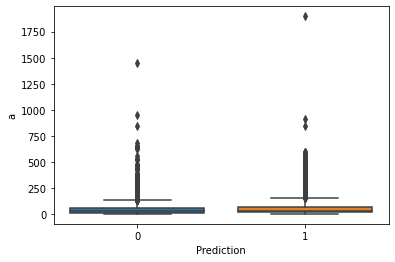

In [9]:
sns.boxplot(x=df['Prediction'], y=df['a'])

<AxesSubplot:xlabel='Prediction', ylabel='the'>

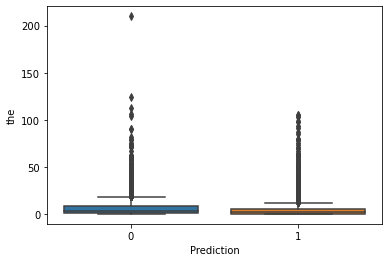

In [10]:
sns.boxplot(x=df['Prediction'], y=df['the'])

<AxesSubplot:xlabel='Prediction', ylabel='infrastructure'>

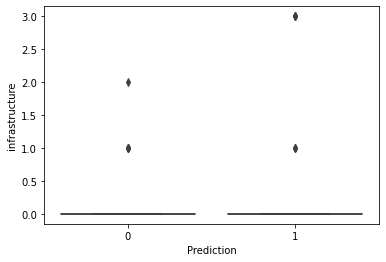

In [11]:
sns.boxplot(x=df['Prediction'], y=df['infrastructure'])

# Task 4
#### Normalize the data

In [12]:
df_1 = df.iloc[:,:-1]
df_1 = pd.DataFrame(normalize(df_1), columns=df_1.columns[:])

# Just train test split

In [13]:
features = df_1.iloc[:,:]
features

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0.000000,0.000000,0.094072,0.000000,0.000000,0.000000,0.188144,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.023453,0.038111,0.070358,0.017590,0.017590,0.005863,0.299023,0.002932,0.079153,0.052769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002932,0.0
2,0.000000,0.000000,0.049326,0.000000,0.000000,0.000000,0.394611,0.000000,0.000000,0.197305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.030395,0.133737,0.000000,0.030395,0.006079,0.310026,0.012158,0.060789,0.006079,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.041197,0.035312,0.100050,0.005885,0.029427,0.011771,0.335462,0.000000,0.052968,0.017656,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005885,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,0.024624,0.024624,0.024624,0.036936,0.000000,0.000000,0.393982,0.000000,0.000000,0.061560,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5168,0.075673,0.058376,0.023783,0.004324,0.012973,0.010810,0.326475,0.008648,0.006486,0.049728,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002162,0.0
5169,0.000000,0.000000,0.032756,0.032756,0.000000,0.000000,0.360317,0.000000,0.000000,0.032756,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5170,0.016025,0.056086,0.008012,0.000000,0.016025,0.008012,0.224345,0.016025,0.000000,0.064099,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008012,0.0


In [14]:
labels = df.iloc[:,-1]
labels

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size = 0.20, random_state = 0)

# Task 5
### To train the following classifiers:
### - kNN

In [16]:
for num in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=num, n_jobs=-1)
    knn.fit(X_train,Y_train)
    knn_pred = knn.predict(X_test)
    print(f'Num neighbors: {num}, Error rate = {np.mean(knn_pred != Y_test)}')

Num neighbors: 1, Error rate = 0.10821256038647344
Num neighbors: 2, Error rate = 0.11400966183574879
Num neighbors: 3, Error rate = 0.13333333333333333
Num neighbors: 4, Error rate = 0.13140096618357489
Num neighbors: 5, Error rate = 0.13429951690821257
Num neighbors: 6, Error rate = 0.13623188405797101
Num neighbors: 7, Error rate = 0.1468599033816425
Num neighbors: 8, Error rate = 0.13719806763285025
Num neighbors: 9, Error rate = 0.14299516908212562
Num neighbors: 10, Error rate = 0.1468599033816425
Num neighbors: 11, Error rate = 0.14879227053140096
Num neighbors: 12, Error rate = 0.14782608695652175
Num neighbors: 13, Error rate = 0.15265700483091788
Num neighbors: 14, Error rate = 0.1565217391304348


Best result with 1 neighbor

In [17]:
knn = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
print(f'Confusion matrix: \n{confusion_matrix(Y_test, knn_pred)}')
print(f'Classification report: \n{classification_report(Y_test, knn_pred)}')

Confusion matrix: 
[[688  62]
 [ 50 235]]
Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       750
           1       0.79      0.82      0.81       285

    accuracy                           0.89      1035
   macro avg       0.86      0.87      0.87      1035
weighted avg       0.89      0.89      0.89      1035



### - decision tree

In [18]:
tree = DecisionTreeClassifier(max_depth=9)
tree.fit(X_train, Y_train)
dec_tree_pred = tree.predict(X_test)
print(f'Confusion matrix: \n{confusion_matrix(Y_test, dec_tree_pred)}')
print(f'Classification report: \n{classification_report(Y_test, dec_tree_pred)}')

Confusion matrix: 
[[705  45]
 [ 52 233]]
Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       750
           1       0.84      0.82      0.83       285

    accuracy                           0.91      1035
   macro avg       0.88      0.88      0.88      1035
weighted avg       0.91      0.91      0.91      1035



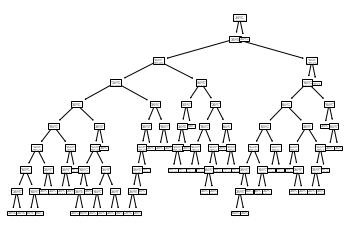

In [19]:
plot_tree(tree)
plt.show()

### - SVM

Linear kernel<br>
Polynomial kernel<br>
RBF kernel<br>
Sigmoid kernel<br>

In [20]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, Y_train)
svm_linear_pred = svm_linear.predict(X_test)
print(f'Confusion matrix: \n{confusion_matrix(Y_test, svm_linear_pred)}')
print(f'Classification report: \n{classification_report(Y_test, svm_linear_pred)}')

Confusion matrix: 
[[702  48]
 [ 53 232]]
Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       750
           1       0.83      0.81      0.82       285

    accuracy                           0.90      1035
   macro avg       0.88      0.88      0.88      1035
weighted avg       0.90      0.90      0.90      1035



In [21]:
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, Y_train)
svm_poly_pred = svm_linear.predict(X_test)
print(f'Confusion matrix: \n{confusion_matrix(Y_test, svm_poly_pred)}')
print(f'Classification report: \n{classification_report(Y_test, svm_poly_pred)}')

Confusion matrix: 
[[702  48]
 [ 53 232]]
Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       750
           1       0.83      0.81      0.82       285

    accuracy                           0.90      1035
   macro avg       0.88      0.88      0.88      1035
weighted avg       0.90      0.90      0.90      1035



In [22]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, Y_train)
svm_rbf_pred = svm_linear.predict(X_test)
print(f'Confusion matrix: \n{confusion_matrix(Y_test, svm_rbf_pred)}')
print(f'Classification report: \n{classification_report(Y_test, svm_rbf_pred)}')

Confusion matrix: 
[[702  48]
 [ 53 232]]
Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       750
           1       0.83      0.81      0.82       285

    accuracy                           0.90      1035
   macro avg       0.88      0.88      0.88      1035
weighted avg       0.90      0.90      0.90      1035



In [23]:
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, Y_train)
svm_sigmoid_pred = svm_linear.predict(X_test)
print(f'Confusion matrix: \n{confusion_matrix(Y_test, svm_sigmoid_pred)}')
print(f'Classification report: \n{classification_report(Y_test, svm_sigmoid_pred)}')

Confusion matrix: 
[[702  48]
 [ 53 232]]
Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       750
           1       0.83      0.81      0.82       285

    accuracy                           0.90      1035
   macro avg       0.88      0.88      0.88      1035
weighted avg       0.90      0.90      0.90      1035



#### SVM Gridsearch

In [25]:
param_grid = {'C': [1, 10, 100], 
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['rbf']} 
svm_grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
svm_grid.fit(X_train, Y_train)
print(svm_grid.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .......................C=1, gamma=1, kernel=rbf; total time=  11.9s
[CV 2/5] END .......................C=1, gamma=1, kernel=rbf; total time=  12.3s
[CV 3/5] END .......................C=1, gamma=1, kernel=rbf; total time=  12.0s
[CV 4/5] END .......................C=1, gamma=1, kernel=rbf; total time=  14.2s
[CV 5/5] END .......................C=1, gamma=1, kernel=rbf; total time=  15.2s
[CV 1/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=  21.6s
[CV 2/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=  21.9s
[CV 3/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=  21.9s
[CV 4/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=  21.8s
[CV 5/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=  22.1s
[CV 1/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=  23.9s
[CV 2/5] END ....................C=1, gamma=0.01,

In [26]:
svm_grid_pred = svm_grid.predict(X_test)
print(f'Confusion matrix: \n{confusion_matrix(Y_test, svm_grid_pred)}')
print(f'Classification report: \n{classification_report(Y_test, svm_grid_pred)}')

Confusion matrix: 
[[731  19]
 [ 11 274]]
Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       750
           1       0.94      0.96      0.95       285

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.96      1035
weighted avg       0.97      0.97      0.97      1035



### Random Forest

In [27]:
rand_for = RandomForestClassifier(random_state = 0)
rand_for.fit(X_train, Y_train)
rand_for_pred = rand_for.predict(X_test)
print(f'Confusion matrix: \n{confusion_matrix(Y_test, rand_for_pred)}')
print(f'Classification report: \n{classification_report(Y_test, rand_for_pred)}')

Confusion matrix: 
[[737  13]
 [ 17 268]]
Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       750
           1       0.95      0.94      0.95       285

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.96      1035
weighted avg       0.97      0.97      0.97      1035



#### Random Forest Gridsearch

In [28]:
param_grid = {'n_estimators': [64, 128, 256],
              'max_depth' : [2, 8, 16]}
rand_for_grid = GridSearchCV(RandomForestClassifier(), param_grid, n_jobs=-1)
rand_for_grid.fit(X_train, Y_train)
print(rand_for_grid.best_params_)

{'max_depth': 16, 'n_estimators': 256}


In [30]:
prediction = rand_for_grid.predict(X_test)
rand_for_grid_pred = rand_for_grid.predict(X_test)
print(f'Confusion matrix: \n{confusion_matrix(Y_test, rand_for_grid_pred)}')
print(f'Classification report: \n{classification_report(Y_test, rand_for_grid_pred)}')

Confusion matrix: 
[[737  13]
 [ 23 262]]
Classification report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       750
           1       0.95      0.92      0.94       285

    accuracy                           0.97      1035
   macro avg       0.96      0.95      0.96      1035
weighted avg       0.97      0.97      0.97      1035



### AdaBoost

In [31]:
ada_boost = AdaBoostClassifier(random_state=0)
ada_boost.fit(X_train, Y_train)
ada_boost_pred = ada_boost.predict(X_test)
print(f'Confusion matrix: \n{confusion_matrix(Y_test, ada_boost_pred)}')
print(f'Classification report: \n{classification_report(Y_test, ada_boost_pred)}')

Confusion matrix: 
[[717  33]
 [ 23 262]]
Classification report: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       750
           1       0.89      0.92      0.90       285

    accuracy                           0.95      1035
   macro avg       0.93      0.94      0.93      1035
weighted avg       0.95      0.95      0.95      1035



#### AdaBoost Gridsearch

In [33]:
param_grid = {'n_estimators': [100, 200, 300], 
              'learning_rate' : [0.01, 0.1, 1]}
ada_boost_grid = GridSearchCV(AdaBoostClassifier(), param_grid, n_jobs=-1)
ada_boost_grid.fit(X_train, Y_train)
print(ada_boost_grid.best_params_)

{'learning_rate': 1, 'n_estimators': 200}


In [34]:
ada_boost_grid_pred = ada_boost_grid.predict(X_test)
print(f'Confusion matrix: \n{confusion_matrix(Y_test, ada_boost_grid_pred)}')
print(f'Classification report: \n{classification_report(Y_test, ada_boost_grid_pred)}')

Confusion matrix: 
[[728  22]
 [ 18 267]]
Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       750
           1       0.92      0.94      0.93       285

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035

